# Setup and Data Import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-cost-dataset/medical_cost.csv


In [3]:
# For Data Preprocessing and cleaning
import pandas as pd
import numpy as np
# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import the data
df = pd.read_csv(r"/kaggle/input/medical-cost-dataset/medical_cost.csv")
df.head(10)

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
5,6,31,female,25.740,0,no,southeast,3756.62160
6,7,46,female,33.440,1,no,southeast,8240.58960
7,8,37,female,27.740,3,no,northwest,7281.50560
8,9,37,male,29.830,2,no,northeast,6406.41070
9,10,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
# Check for duplicated rows
df.duplicated().sum()

0

# Data Visualization

In [8]:
df.groupby('sex')['Id'].count().reset_index()

,sex,Id
0,female,662
1,male,676


In [9]:
df.groupby('smoker')['Id'].count().reset_index()

,smoker,Id
0,no,1064
1,yes,274


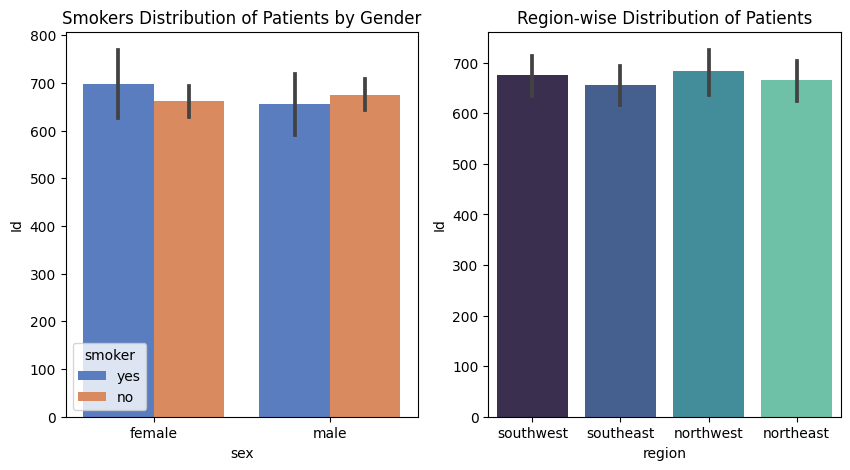

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
sns.barplot(data = df, x = df['sex'], y = df['Id'], hue = "smoker", 
            ax=ax1, palette ="muted")
ax1.set_title('Smokers Distribution of Patients by Gender')
sns.barplot(data = df, x = df['region'],y = df['Id'],
            ax=ax2, palette = "mako")
ax2.set_title('Region-wise Distribution of Patients')


plt.show()

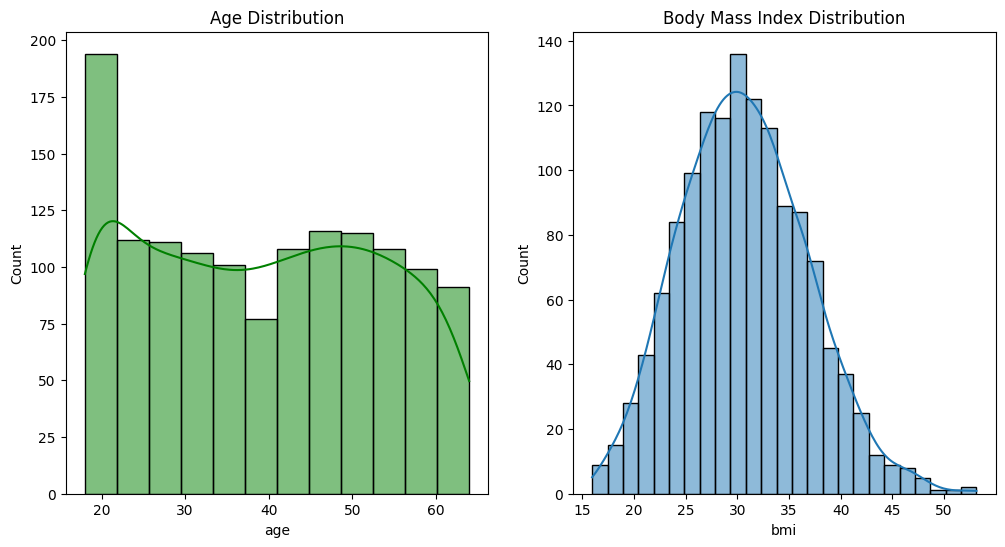

In [11]:
fi, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['age'], kde=True, color="green",ax=ax1)
ax1.set_title("Age Distribution")
sns.histplot(df['bmi'],kde=True, ax=ax2)
ax2.set_title("Body Mass Index Distribution")
plt.show()

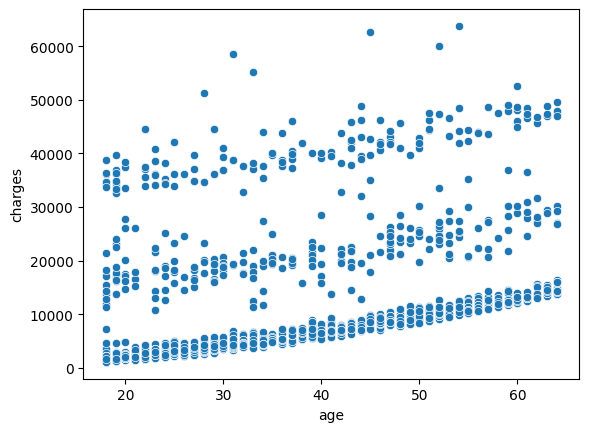

In [12]:
sns.scatterplot(data=df, x = df['age'], y = df['charges'])
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

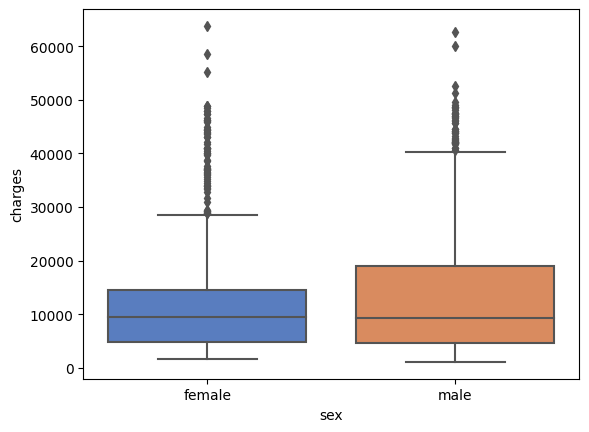

In [14]:
sns.boxplot(data=df, x = df['sex'], y = df['charges'], palette = 'muted')

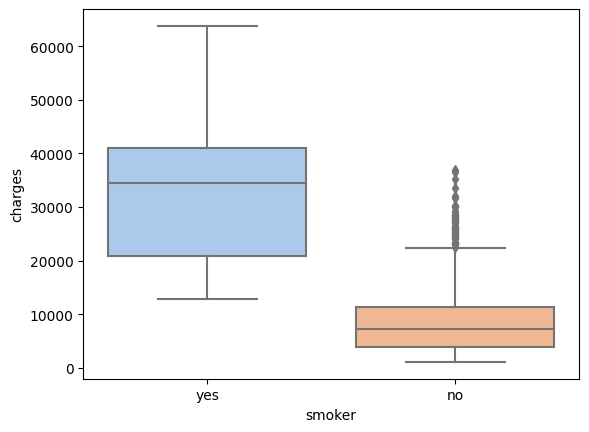

In [15]:
sns.boxplot(data=df, x = df['smoker'], y = df['charges'], palette = "pastel")
plt.show()

**From the above graphs we can conclude that,**
- There are male patients than female patients.
- Approximately 1000 patients are non smokers.
- Female patients are more likely to suffer from smoking-related diseases than male patients.
- The northwest region has the highest number of patients, followed by the southwest, northeast, and the sowtheast region.
- The age-charges scatter plot shows a positive correlation between the age of the person and the number of charges they have. This means that, in general, older people have more charges than younger people.
- The age distribution is skewed to the left, meaning that there are more younger people in the population than older people.
- The age distribution graph shows a slight peak at around 20 years old, which is likely due to the inclusion of college students in the population sample.
- The BMI distribution graph shows a sharp increase in the number of people with BMIs over 30 after the age of 40. This is consistent with the well-known fact that obesity rates tend to increase with age.
- Female patients have a greater range of changes in charges than male patients.
- Smokers have higher median insurance charges than non-smokers.


# Feature Engineering
- Label Encoding is a process of converting categorical features into numerical features so that these features can be fitted into ML models that takes only numerical data.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
# Female is labeled as 0 while Male is labeled as 1
df['sex'] = le.fit_transform(df['sex'])
df['sex'].unique()

array([0, 1])

In [18]:
# Yes is labeled as 1 while No is labeled as 0
df['smoker'] = le.fit_transform(df['smoker'])
df['smoker'].unique()

array([1, 0])

In [19]:
# Northeast is labeled as 0 while Northwest is labeled as 1, Southeast is labeled as 2, 
# and Southwest is labeled as 3.
df['region'] = le.fit_transform(df['region'])
df['region'].unique()

array([3, 2, 1, 0])

In [20]:
# Variable to predict is the 'charges'
x = df.drop('charges', axis = 1)
y = df['charges']

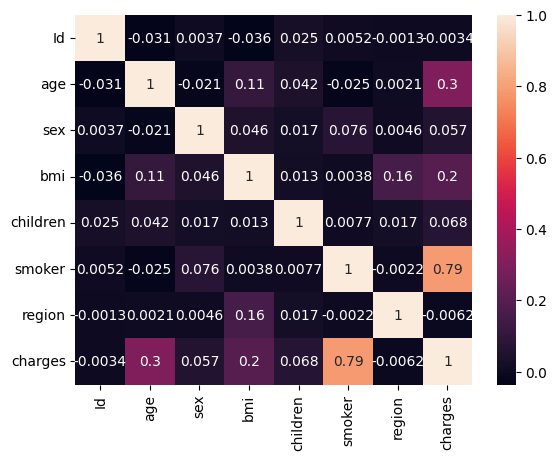

In [21]:
corr_table = df.corr()
sns.heatmap(corr_table, annot=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state=32)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 7)
(402, 7)
(936,)
(402,)


## 1. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_test, y_test)

0.7714206889032709

## 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [29]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
tree.score(x_test,y_test)

0.6911749321305422

## 3. Random Forest 

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [32]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [33]:
rf.score(x_test, y_test)

0.8555743517544084

## 4. SVM

In [34]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [35]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [36]:
svr.score(x_test, y_test)

-0.1540397822972852

# HyperParameter Tuning of the best model
After testing the performance of the 4 models, Random Forest Regressor has the best model accuracy which is approximately 85%. 
Lets optimize the model to give better results.
<br>**Hyperparameter tuning** is a process of tweaking the hyperparameters of the model to give better results. 
<br>Parameters used to provide optimized performance of the model are called **hyperparameters**.

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

In [38]:
## Defining the parameters

# n_estimators - no. of trees of random forest. Default value is 100
n_estimators = [100,200,300]

# max_features - max no. of features to consider at every split. Default value is 'sqrt'.
# 'log2', None can also be used.
max_features = [2,4,6]

# max_depth - max no. of splits of tree. Default is None.
max_depth = [2,5,8]

# max_samples - How much of dataset must be given to each tree. Default is None.
max_samples = [0.5, 0.75, 1.0]

In [39]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'max_samples':max_samples
}
param_grid

{'n_estimators': [100, 200, 300],
 'max_features': [2, 4, 6],
 'max_depth': [2, 5, 8],
 'max_samples': [0.5, 0.75, 1.0]}

In [40]:
rf_grid = GridSearchCV(estimator=rf,
                      param_grid = param_grid,
                      cv=5,
                      verbose=2,
                      n_jobs=-1)

# cv -  Number of cross validation for each set of hyperparameters.
# verbose - To display detail information.
# n_jobs - number of processors used. -1 uses all.

In [41]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=2, max_features=2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=2, max_samples=0.5, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, max_features=2, max_samples=0.5, n_estimators=300; total time=   0.9s
[CV] END max_depth=2, max_features=2, max_samples=0.5, n_estimators=300; total time=   0.9s
[CV] END max_depth=2, max_features=2, max_samples=0.75, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, max_features=2, max_samples=0.75, n_estimators=300; total time=   0.9s
[CV] END max_depth=2, max_features=2, max_samples=1.0, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=2, max_samples=1.0, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=2, max_samples=1.0, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, max_features=2, max_samples=1.0, n_estimators=200; total time=   0.6s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 4, 6],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

[CV] END max_depth=8, max_features=4, max_samples=0.75, n_estimators=300; total time=   1.2s
[CV] END max_depth=8, max_features=4, max_samples=0.75, n_estimators=300; total time=   1.2s
[CV] END max_depth=8, max_features=4, max_samples=1.0, n_estimators=200; total time=   0.8s
[CV] END max_depth=8, max_features=4, max_samples=1.0, n_estimators=300; total time=   1.2s
[CV] END max_depth=8, max_features=6, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=6, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=6, max_samples=0.5, n_estimators=200; total time=   0.8s
[CV] END max_depth=8, max_features=6, max_samples=0.5, n_estimators=300; total time=   1.2s
[CV] END max_depth=8, max_features=6, max_samples=0.5, n_estimators=300; total time=   1.2s
[CV] END max_depth=8, max_features=6, max_samples=0.75, n_estimators=200; total time=   0.9s
[CV] END max_depth=8, max_features=6, max_samples=0.75, n_estimators=300; tot

In [ ]:
print(f"Best Score: " + str(rf_grid.best_score_))
print(f"Best Index: " + str(rf_grid.best_index_))
print(f"Best Parameters: " + str(rf_grid.best_params_))

In [ ]:
# Use the hyperparameters values 
rf_final = RandomForestRegressor(n_estimators = 100,
                                max_depth = 5,
                                max_samples = 0.5,
                                max_features=6)

In [ ]:
rf_final.fit(x_train, y_train)

In [ ]:
# The accuracy increased from 85 to 87% accuracy after hyperparameter tuning.
rf_final.score(x_test,y_test)

# Save the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_final, "Random_Forest_Regressor")
print('Model has been saved.')